In [19]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt




<Axes: xlabel='Fare'>

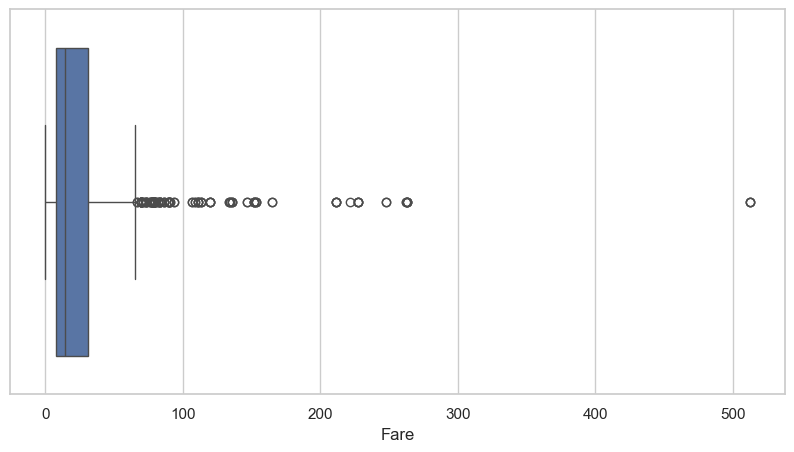

In [294]:
# 이상값 시각화하기
titanic =pd.read_csv('data/titanic.csv')
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,5))
sns.boxplot(x=titanic.Fare)

In [26]:
# IQR 기법
# 1사분위수 와 3사분위수 의 차이값을 계산: 3사분위수-1사분위수
# 1사분위수에서 차이값 * 1.5한 값 미만과 3사분위수+차이값*1.5 초과한 값을 이상값으로 한다.
def outline_iqr(data,column):
    global lower,upper
    # q1=np.percentile(data[column],q=0.25) # 1사분위수
    # q3=np.percentile(data[column],q=0.75) # 3사분위수
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    iqr=q3-q1
    cut_iqr=iqr*1.5
    lower=q1-cut_iqr
    upper=q3+cut_iqr
    print('lower의 기준값은  ',lower)
    print('upper의 기준값은 ',upper)
    lower_data=data[data[column]<lower]
    upper_data=data[data[column]>upper]
    print('lower_data: ',lower_data)
    print('upper_data: ',upper_data)

outline_iqr(titanic,'Fare')
    
    


lower의 기준값은   -26.724
upper의 기준값은  65.6344
lower_data:  Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
upper_data:       PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
34                            

<Figure size 1000x500 with 0 Axes>

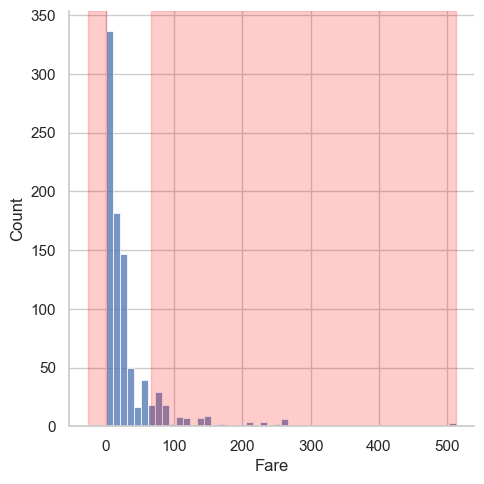

In [36]:
# 탐지된 이상값의 범위를 시각화
plt.figure(figsize=(10,5))
sns.displot(titanic.Fare,bins=50,kde=False)  # 요금에 대해서 50구간으로 나누고 출력
plt.axvspan(xmin=lower,xmax=titanic.Fare.min(),alpha=0.2,color='red')  # 최고 적은값을 lower max는 fare의 min까지 
plt.axvspan(xmin=upper,xmax=titanic.Fare.max(),alpha=0.2,color='red')
plt.show()
# 빨간색이 이상값이다.

In [60]:
# 이상값 제거
titanic_1=titanic[(titanic['Fare']>=lower)&(titanic['Fare']<=upper)]
titanic_1
# 이상값 평균값으로 대체
titanic_2=titanic[~((titanic['Fare']>=lower)&(titanic['Fare']<=upper))]
titanic_2_index=titanic_2.index
titanic.iloc[titanic_2.index,9]=titanic.Fare.mean()   # titanic2의 인덱스를 가져와 인덱스로 튜플을 참조하는 iloc를 이용해 평균값으로 해당 튜플값 대체
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket       Fare Cabin Embarked  
0      0         A/5 21171   7.250000   NaN        S  
1      0          PC 17599  32.204208   C85        C  
2      0  STON/O2. 3101282   7.925000   NaN        S  
3      0            113803  53.100000  C123        S  
4      0            373450   8.050000   NaN        S

In [62]:
# 문자열 데이터 분리
titanic.Name.str.split()

0                           [Braund,, Mr., Owen, Harris]
1      [Cumings,, Mrs., John, Bradley, (Florence, Bri...
2                             [Heikkinen,, Miss., Laina]
3      [Futrelle,, Mrs., Jacques, Heath, (Lily, May, ...
4                          [Allen,, Mr., William, Henry]
                             ...                        
886                            [Montvila,, Rev., Juozas]
887                    [Graham,, Miss., Margaret, Edith]
888       [Johnston,, Miss., Catherine, Helen, "Carrie"]
889                           [Behr,, Mr., Karl, Howell]
890                              [Dooley,, Mr., Patrick]
Name: Name, Length: 891, dtype: object

In [66]:
titanic.Name.str.split(' ',expand=True)  # expand는 분리 후 컬럼을 지정

0      1          2        3          4       5        6     7   \
0       Braund,    Mr.       Owen   Harris       None    None     None  None   
1      Cumings,   Mrs.       John  Bradley  (Florence  Briggs  Thayer)  None   
2    Heikkinen,  Miss.      Laina     None       None    None     None  None   
3     Futrelle,   Mrs.    Jacques    Heath      (Lily     May    Peel)  None   
4        Allen,    Mr.    William    Henry       None    None     None  None   
..          ...    ...        ...      ...        ...     ...      ...   ...   
886   Montvila,   Rev.     Juozas     None       None    None     None  None   
887     Graham,  Miss.   Margaret    Edith       None    None     None  None   
888   Johnston,  Miss.  Catherine    Helen   "Carrie"    None     None  None   
889       Behr,    Mr.       Karl   Howell       None    None     None  None   
890     Dooley,    Mr.    Patrick     None       None    None     None  None   

       8     9     10    11    12    13  
0    None  None  None  None  None  None  
1    None  None  None  None  None  None  
2    None  None  None  None  None  None  
3    None  None  None  None  None  None  
4    None  None  None  None  None  None  
..    ...   ...   ...   ...   ...   ...  
886  None  None  None  None  None  None  
887  None  None  None  None  None  None  
888  None  None  None  None  None  None  
889  None  None  None  None  None  None  
890  None  None  None  None  None  None  

[891 rows x 14 columns]

In [296]:
titanic['title']=titanic.Name.str.split().str[1]
titanic.title.value_counts()

title
Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Planke,           3
Impe,             3
Gordon,           2
Col.              2
Mlle.             2
Major.            2
Melkebeke,        1
Jonkheer.         1
Shawah,           1
the               1
Velde,            1
Capt.             1
Messemaeker,      1
Carlo,            1
Ms.               1
Mme.              1
Steen,            1
Mulder,           1
Pelsmaeker,       1
Walle,            1
der               1
Billiard,         1
Don.              1
Cruyssen,         1
Name: count, dtype: int64

In [298]:
titanic['title']=titanic['title'].str.replace('Mlle','Miss',regex=False) # refex=정규화를 하지 않겠다.
titanic['title']=titanic['title'].str.replace('Ms','Miss',regex=False)
titanic['title']=titanic['title'].str.replace('Mme','Mrs',regex=False)

In [280]:
rare_list=titanic[~(titanic['title'].isin(['Mr.','Miss.','Mrs.','Master.']))]

for i in range(6,len(rare_list)):
         titanic['title']=titanic['title'].str.replace(rare_list['title'].iloc[i],'Rare',regex=False)

titanic.title.value_counts()

title
Mr.        502
Miss.      182
Mrs.       122
Rare        45
Master.     40
Name: count, dtype: int64

In [316]:
tlist=titanic[~(titanic['title'].isin(['Mr.','Miss.','Mrs.','Master.']))]
rare_list=titanic.iloc[tlist.index,12].unique()

np.set_printoptions(threshold=np.inf)  # 배열 출력 시 생략 없이 모두 출력
print(rare_list)
#rare_list=list(rare_list)
#for title in rare_list:
#    titanic['title']=titanic['title'].str.replace(title,'Rare',regex=False)

#print(rare_list)
#titanic.title.value_counts()

['Planke,' 'Don.' 'Rev.' 'Billiard,' 'der' 'Walle,' 'Dr.' 'Pelsmaeker,'
 'Mulder,' 'y' 'Steen,' 'Carlo,' 'Impe,' 'Major.' 'Gordon,' 'Messemaeker,'
 'Col.' 'Capt.' 'Velde,' 'the' 'Shawah,' 'Jonkheer.' 'Melkebeke,'
 'Cruyssen,']


In [302]:
type(rare_list)

numpy.ndarray

In [256]:
titanic

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  title  
0        0         A/5 21171   7.2500   NaN        S    Mr.  
1        0          PC 17599  71.2833   C85        C   Mrs.  
2        0  STON/O2. 3101282   7.9250   NaN        S  Miss.  
3        0            113803  53.1000  C123        S   Mrs.  
4        0            373450   8.0500   NaN        S    Mr.  
..     ...               ...      ...   ...      ...    ...  
886      0            211536  13.0000   NaN        S   Rare  
887      0            112053  30.0000   B42        S  Miss.  
888      2        W./C. 6607  23.4500   NaN        S  Miss.  
889      0            111369  30.0000  C148        C    Mr.  
890      0            370376   7.7500   NaN        Q    Mr.  

[891 rows x 13 columns]

In [318]:
titanic=pd.read_csv('data/titanic.csv')
titanic['title']=titanic.Name.str.extract(r'([A-Za-z]+)\.',expand=False)
titanic['title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: title, Length: 891, dtype: object

In [342]:
titanic[titanic.Name.str.count(r'(^Z.*)')==1]  # 두개의  실행결과는 같다. 정규표현식 (이름중에서 대문자 Z로시작하는 문자)
titanic[titanic.Name.str.match(r'(^Z.*)+o$')==True]  # Z로 시작하고 o로 끝나는 사람 출력

PassengerId  Survived  Pclass                Name   Sex   Age  SibSp  \
422          423         0       3  Zimmerman, Mr. Leo  male  29.0      0   

     Parch  Ticket   Fare Cabin Embarked title  
422      0  315082  7.875   NaN        S    Mr

In [352]:
titanic.Name.str.count('').max()

83

In [354]:
titanic=pd.read_csv('data/titanic.csv')
print(titanic.Age.min())
print(titanic.Age.max())

0.42
80.0


In [368]:
import pandas as pd
# 구간형 카테고리 타입
bins = [0, 9, 18, 40, 60, 80] 
labels = ['어린이', '청소년', '20/30대', '40/50대', '80대이상']

titanic['Age_bind_cut'] = pd.cut(titanic['Age'], bins=bins, labels=labels)
print(titanic['Age_bind_cut'].dtype)
titanic['Age_bind_cut']

category


0      20/30대
1      20/30대
2      20/30대
3      20/30대
4      20/30대
        ...  
886    20/30대
887    20/30대
888       NaN
889    20/30대
890    20/30대
Name: Age_bind_cut, Length: 891, dtype: category
Categories (5, object): ['어린이' < '청소년' < '20/30대' < '40/50대' < '80대이상']

In [370]:
titanic['Age_bind_cut'].value_counts()

Age_bind_cut
20/30대    425
40/50대    128
청소년        77
어린이        62
80대이상      22
Name: count, dtype: int64

In [380]:


titanic['Age_bind_cut'].value_counts().to_frame().style.background_gradient(cmap='viridis')

In [382]:
# 비율형 category type
titanic=pd.read_csv('data/titanic.csv')
bins = [0, 9, 18, 40, 60, 80] 
labels = ['어린이', '청소년', '20/30대', '40/50대', '80대이상']

titanic['Age_bind_cut'] = pd.qcut(titanic['Age'], q=5, labels=labels)
titanic[['Name','Age','Age_bind_cut']]
titanic['Age_bind_cut'].value_counts()

Age_bind_cut
어린이       164
40/50대    144
80대이상     142
청소년       137
20/30대    127
Name: count, dtype: int64